In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, preprocessing, metrics
# import libraries
import sklearn as sk
import math 
import pprint
from scipy.stats import normaltest

In [69]:
df = pd.read_json('companies.json')
df.head(5)

,vat,name,address,zipcode,city,cityname,protected,phone,email,fax,...,industrydesc,companycode,companydesc,creditstartdate,creditbankrupt,creditstatus,owners,productionunits,t,version
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,NaN,False,44601000.0,info@kmd.dk,44604106.0,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,NaN,False,39175000.0,None,NaN,...,Livsforsikring,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,NaN,False,70253355.0,None,NaN,...,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,NaN,False,39177100.0,None,39277900.0,...,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,NaN,False,70158585.0,None,NaN,...,Finansielle holdingselskaber,60,Aktieselskab,NaN,False,NaN,[{'name': 'Sampo plc'}],"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6


In [63]:
# number of columns and rows
print("Number of columns:", len(df.columns))
print("Number of rows:", len(df))

Number of columns: 25
Number of rows: 12


In [40]:
# type of data
print("Data types:")
print(df.dtypes)

Data types:
vat                  int64
name                object
address             object
zipcode              int64
city                object
cityname           float64
protected             bool
phone              float64
email               object
fax                float64
startdate           object
enddate            float64
employees            int64
addressco          float64
industrycode         int64
industrydesc        object
companycode          int64
companydesc         object
creditstartdate    float64
creditbankrupt        bool
creditstatus       float64
owners              object
productionunits     object
t                    int64
version              int64
dtype: object


In [57]:
# distribution of numeric data
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    p_value = normaltest(df[col])[1]
    if p_value < 0.05:
        print(col, "is not normally distributed")
    else:
        print(col, "is normally distributed")

vat is normally distributed
zipcode is not normally distributed
cityname is normally distributed
phone is normally distributed
fax is normally distributed
enddate is normally distributed
employees is not normally distributed
addressco is normally distributed
industrycode is normally distributed
companycode is not normally distributed
creditstartdate is normally distributed
creditstatus is normally distributed
t is normally distributed
version is normally distributed


/Users/markusagnsgaard/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/markusagnsgaard/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1667: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/markusagnsgaard/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1771: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


In [42]:
# descriptive parameters of the numeric data
print("Descriptive parameters of numeric data:")
print(df.describe())

Descriptive parameters of numeric data:
                vat      zipcode  cityname         phone           fax  \
count  1.200000e+01    12.000000       0.0  1.000000e+01  3.000000e+00   
mean   3.414293e+07  2908.000000       NaN  5.776151e+07  6.077057e+07   
std    2.009266e+07  2296.064815       NaN  2.037813e+07  3.272232e+07   
min    1.012136e+07  1123.000000       NaN  3.325656e+07  3.927790e+07   
25%    2.189630e+07  1927.000000       NaN  4.049505e+07  4.194100e+07   
50%    2.834175e+07  2750.000000       NaN  5.736622e+07  4.460411e+07   
75%    4.127090e+07  2753.750000       NaN  7.019455e+07  7.151691e+07   
max    7.804002e+07  9900.000000       NaN  9.620667e+07  9.842971e+07   

       enddate     employees  addressco   industrycode  companycode  \
count      0.0     12.000000        0.0      12.000000    12.000000   
mean       NaN   2733.833333        NaN  527426.666667    61.666667   
std        NaN   6076.870035        NaN  170009.375588     5.773503   
min      

In [43]:
# missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
vat                 0
name                0
address             0
zipcode             0
city                0
cityname           12
protected           0
phone               2
email               8
fax                 9
startdate           0
enddate            12
employees           0
addressco          12
industrycode        0
industrydesc        0
companycode         0
companydesc         0
creditstartdate    12
creditbankrupt      0
creditstatus       12
owners             10
productionunits     0
t                   0
version             0
dtype: int64


In [59]:
df.head()

,vat,name,address,zipcode,city,cityname,protected,phone,email,fax,...,industrydesc,companycode,companydesc,creditstartdate,creditbankrupt,creditstatus,owners,productionunits,t,version
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,NaN,False,44601000.0,info@kmd.dk,44604106.0,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,NaN,False,39175000.0,None,NaN,...,Livsforsikring,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,NaN,False,70253355.0,None,NaN,...,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,NaN,False,39177100.0,None,39277900.0,...,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,NaN,False,NaN,None,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,NaN,False,70158585.0,None,NaN,...,Finansielle holdingselskaber,60,Aktieselskab,NaN,False,NaN,[{'name': 'Sampo plc'}],"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6


In [70]:
df = df.drop(columns='creditstartdate')
df = df.drop(columns='creditbankrupt')
df = df.drop(columns='creditstatus')
df = df.drop(columns='owners')
df = df.drop(columns='enddate')
df = df.drop(columns='addressco')
df = df.drop(columns='cityname')

In [71]:
df.head(5)

,vat,name,address,zipcode,city,protected,phone,email,fax,startdate,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.0,info@kmd.dk,44604106.0,03/12 - 2002,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.0,None,NaN,16/10 - 1999,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.0,None,NaN,07/11 - 2019,34,265100,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.0,None,39277900.0,30/12 - 1957,1596,266010,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.0,None,NaN,20/05 - 1985,8,642010,Finansielle holdingselskaber,60,Aktieselskab,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6


In [72]:
df.to_csv("task2.2.csv")

In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Læser fra csv fil
df = pd.read_csv('task2.2.csv', usecols=['name', 'address', 'zipcode', 'city', 'startdate', 'employees', 'industrydesc', 'companydesc', 'productionunits'])

# drill down attributes - og laver en ny column for month
df['month'] = pd.to_datetime(df['startdate']).dt.month

# roll up attributes - og gruppere dem efter month and og udregner average antal af employees
avg_employees_by_month = df.groupby('month')['employees'].mean()

# Bruger labelencoder til at give text data, numeral labels
industry_encoder = LabelEncoder()
df['industry_code'] = industry_encoder.fit_transform(df['industrydesc'])

# Bruger labelencoder til at give text data, numeral labels
company_encoder = LabelEncoder()
df['company_code'] = company_encoder.fit_transform(df['companydesc'])

print(df.head())
print(avg_employees_by_month)

                                    name           address  zipcode  \
0                                KMD A/S  Lautrupparken 40     2750   
1  PFA PENSION, FORSIKRINGSAKTIESELSKAB.   Sundkrogsgade 4     2100   
2                           Dynatest A/S       Tempovej 27     2750   
3                             OTICON A/S     Kongebakken 9     2765   
4                         TOPDANMARK A/S       Borupvang 4     2750   

          city     startdate  employees  \
0     Ballerup  03/12 - 2002       1886   
1  København Ø  16/10 - 1999       1464   
2     Ballerup  07/11 - 2019         34   
3       Smørum  30/12 - 1957       1596   
4     Ballerup  20/05 - 1985          8   

                                        industrydesc   companydesc  \
0  Konsulentbistand vedrørende informationsteknologi  Aktieselskab   
1                                     Livsforsikring  Aktieselskab   
2  Fremstilling af udstyr til måling, afprøvning,...  Aktieselskab   
3       Fremstilling af høreappara

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df1 = pd.read_csv('task2.2.csv')

# laver code the industrydesc column with numeral labels
industry_encoder = LabelEncoder()
df1['industry_code'] = industry_encoder.fit_transform(df1['industrydesc'])

# giver companydesc column  numeral labels
company_encoder = LabelEncoder()
df1['company_code'] = company_encoder.fit_transform(df1['companydesc'])

print(df1.head())

   Unnamed: 0       vat                                   name  \
0           0  26911745                                KMD A/S   
1           1  13594376  PFA PENSION, FORSIKRINGSAKTIESELSKAB.   
2           2  40916458                           Dynatest A/S   
3           3  42334219                             OTICON A/S   
4           4  78040017                         TOPDANMARK A/S   

            address  zipcode         city  protected       phone        email  \
0  Lautrupparken 40     2750     Ballerup      False  44601000.0  info@kmd.dk   
1   Sundkrogsgade 4     2100  København Ø      False  39175000.0          NaN   
2       Tempovej 27     2750     Ballerup      False  70253355.0          NaN   
3     Kongebakken 9     2765       Smørum      False  39177100.0          NaN   
4       Borupvang 4     2750     Ballerup      False  70158585.0          NaN   

          fax  ... employees  industrycode  \
0  44604106.0  ...      1886        620200   
1         NaN  ...      

In [78]:
df1.head()

,Unnamed: 0,vat,name,address,zipcode,city,protected,phone,email,fax,...,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version,industry_code,company_code
0,0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.0,info@kmd.dk,44604106.0,...,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6,6,0
1,1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.0,NaN,NaN,...,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6,7,0
2,2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.0,NaN,NaN,...,34,265100,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6,5,0
3,3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.0,NaN,39277900.0,...,1596,266010,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6,4,0
4,4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.0,NaN,NaN,...,8,642010,Finansielle holdingselskaber,60,Aktieselskab,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6,2,0


## Analyze the correlations and/or the similarity of the properties as appropriate

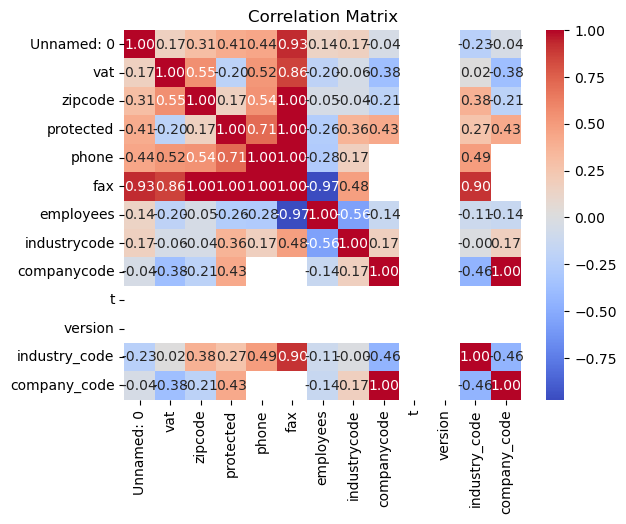

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# beregner den parvise korrelation af kolonner
corr = df1.corr()

# plot the korrelation matrix som et heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Optional Geo.map 

In [51]:
import pandas as pd
import requests
import folium

# læserdata fra csv filen
dfMap = pd.read_csv('finaldatasetwithNames.csv')

# laver en funktion til at få lattitude og longitude værdierne fra en adresse
def get_lat_lng(address):
    api_key = 'xxxxxxx'
    url = f'https://api.opencagedata.com/geocode/v1/json?key={api_key}&q={address}&pretty=1'
    response = requests.get(url).json()
    lat = response['results'][0]['geometry']['lat']
    lng = response['results'][0]['geometry']['lng']
    return lat, lng

# tilfjer latitude og longitude columns til mit df
dfMap['latitude'], dfMap['longitude'] = zip(*dfMap['address'].apply(get_lat_lng))

# laver et map med Leaflet
m = folium.Map(location=[dfMap['latitude'].mean(), dfMap['longitude'].mean()], zoom_start=12)

# add'er nogle markers for hver adresse
for i, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['address']).add_to(m)

# gemmer kortet som en HTML fil
#det kan blive fundet i under folderen, hvor filen hedder map.html og så skal der bare zoomes ind på danmark
m.save('map.html')